### https://d2l.ai/chapter_optimization/lr-scheduler.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Polynomial Decay: 
### $\eta_t = \eta_0 * (t+1)^\frac {1}{2}$

In [ ]:
class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * (num_update + 1.0) ** -0.5

In [ ]:
y = np.arange(0, 300, 1)

In [ ]:
lrs = SquareRootScheduler(lr=0.3)
x_list_src = list()
for i in range(len(y)):
  x_list_src.append(lrs(y[i]))

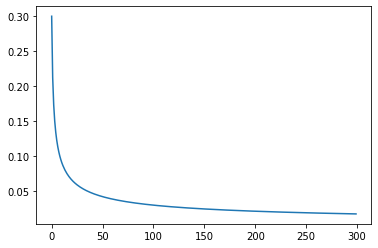

In [ ]:
plt.plot(y,x_list_src)
plt.show()

### Factor schedular: 
### $\eta_{t+1} = \eta_t * \alpha$
### check for a lower bound of LR: $\eta_{t+1} = max(\eta_{min}, \eta_t * \alpha)$

In [ ]:
class FactorScheduler:
    def __init__(self, factor=1, stop_factor_lr=1e-7, base_lr=0.1):
        self.factor = factor
        self.stop_factor_lr = stop_factor_lr
        self.base_lr = base_lr

    def __call__(self, num_update):
        self.base_lr = max(self.stop_factor_lr, self.base_lr * self.factor)
        return self.base_lr

In [ ]:
lrs = FactorScheduler(factor=0.9, stop_factor_lr=1e-2, base_lr=0.3)

In [ ]:
x_list_fs = list()
for i in range(len(y)):
  x_list_fs.append(lrs(y[i]))

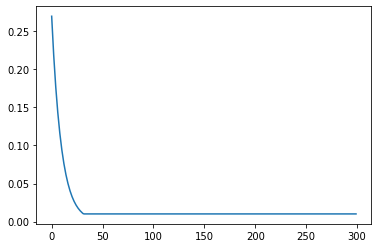

In [ ]:
plt.plot(y,x_list_fs)
plt.show()

### Multifactor Scheduler
### Reduce the learning rate at the given steps
### $S = \{10, 20, 30\}$
### $\eta_{t+1} = \eta_t * \alpha$ where $t \in S$

In [ ]:
class MultiFactorScheduler:
    def __init__(self, step, factor, base_lr):
        self.step = step
        self.factor = factor
        self.base_lr = base_lr

    def __call__(self, epoch):
        if epoch in self.step:
            self.base_lr = self.base_lr * self.factor
            return self.base_lr
        else:
            return self.base_lr

In [ ]:
lrs = MultiFactorScheduler(step=[100, 150], factor=0.5, base_lr=0.3)

In [ ]:
x_list_mfs = list()
for i in range(len(y)):
  x_list_mfs.append(lrs(y[i]))

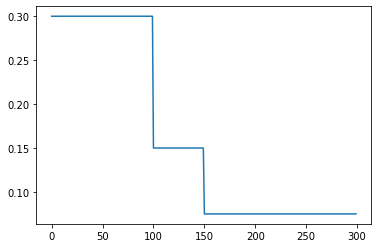

In [ ]:
plt.plot(y,x_list_mfs)
plt.show()

### Cosine scheduler
### Specially in image processing, it is better to have a slow reduction in LR at the beginning and faster decay later
### For a given number of epochs $T$, compute the LR as:
### $\eta_{t+1} = \eta_T + \frac {\eta_0 - \eta_t}{2}(1+cos(\frac{\pi t}{T}))$ where $t \in [0, T]$ 


In [ ]:
class CosineScheduler:
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
               warmup_steps=0, warmup_begin_lr=0):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps

    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) \
                       * float(epoch) / float(self.warmup_steps)
        return self.warmup_begin_lr + increase

    def __call__(self, epoch):
      if epoch < self.warmup_steps:
        return self.get_warmup_lr(epoch)
      if epoch <= self.max_update:
        self.base_lr = self.final_lr + (
                          self.base_lr_orig - self.final_lr) * (1 + math.cos(
                          math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr

In [ ]:
lrs = CosineScheduler(max_update=300, base_lr=0.3, final_lr=0.01)

In [ ]:
x_list_csh = list()
for i in range(len(y)):
  x_list_csh.append(lrs(y[i]))

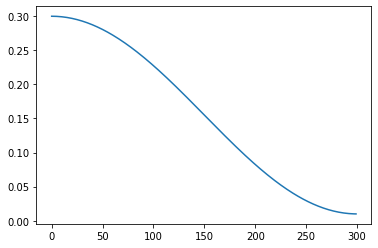

In [ ]:
plt.plot(y,x_list_csh)
plt.show()

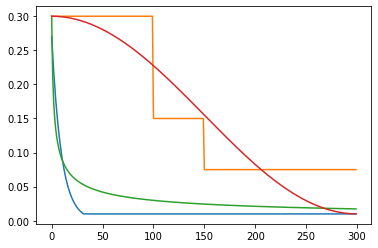

In [ ]:
plt.plot(y,x_list_fs)
plt.plot(y,x_list_mfs)
plt.plot(y,x_list_src)
plt.plot(y,x_list_csh)
plt.show()